# Multiple Linear Regression
## Bike Sharing Assignment

#### Problem Statement:

A US bike-sharing provider BoomBikes aspires to understand the demand for shared bikes among the people and the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

- Which variables are significant in predicting the demand for shared bikes.
- How well those variables describe the bike demands

Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors.

#### Business Goal:
We are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 

## Steps

Following steps are followed;

1) Understanding the Data
2) Data preparation
3) Training model
4) Residual analysis
5) Prediction and evaluation of models


## Step 1: Understanding the Data

Let us first import NumPy and Pandas and read the housing dataset

In [4]:
import numpy as np
import pandas as pd

In [70]:
dailyBikeData = pd.read_csv("day.csv")

In [71]:
dailyBikeData.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [72]:
dailyBikeData.shape

(730, 16)

In [73]:
dailyBikeData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


#### There are 730 rows and none have non-null/missing values.

#### Looking at the data dictionary 'cnt' is the count of bikes rented on that day which is the demand of shared bikes. Our target variable is 'cnt' (demand of bikes). Total bike count 'cnt' is sum of the 'casual' and 'registered' bikes and both represent the demand which are already acounted in the 'cnt' column so they can be droped. 

#### 'instant' has unique value for each row so can be dropped.

#### 'temp' is redundant to 'atemp' so can be dropped.

In [74]:
dailyBikeData = dailyBikeData.drop(['instant','temp','registered','casual'],axis=1)

The 'weathersit' and 'season' variables have 1,2,3,4 values which numeerically indicate some order but looking at data dictionary there is no order so will convert them to categorical variables 

In [75]:
replace_values = {1: 'Clear',2: 'Mist',3: 'Light Rain',4:'Heavy Rain'}
dailyBikeData['weathersit'] = dailyBikeData['weathersit'].map(replace_values)

In [76]:
replace_values = {1:'spring', 2:'summer', 3:'fall', 4:'winter'}
dailyBikeData['season'] = dailyBikeData['season'].map(replace_values)

#### We have 'yr and 'mnth' variables so we also derive a 'day' variable form the 'dteday' for better ananlysis

In [77]:
dailyBikeData['dteday'] = pd.to_datetime(dailyBikeData['dteday'],format = "%d-%m-%Y")
dailyBikeData['day'] = dailyBikeData['dteday'].dt.day

In [78]:
dailyBikeData.pop('dteday')

0     2018-01-01
1     2018-01-02
2     2018-01-03
3     2018-01-04
4     2018-01-05
         ...    
725   2019-12-27
726   2019-12-28
727   2019-12-29
728   2019-12-30
729   2019-12-31
Name: dteday, Length: 730, dtype: datetime64[ns]

In [79]:
dailyBikeData.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,cnt,day
0,spring,0,1,0,6,0,Mist,18.18125,80.5833,10.749882,985,1
1,spring,0,1,0,0,0,Mist,17.68695,69.6087,16.652113,801,2
2,spring,0,1,0,1,1,Clear,9.47025,43.7273,16.636703,1349,3
3,spring,0,1,0,2,1,Clear,10.60610,59.0435,10.739832,1562,4
4,spring,0,1,0,3,1,Clear,11.46350,43.6957,12.522300,1600,5


In [80]:
dailyBikeData.describe()

,yr,mnth,holiday,weekday,workingday,atemp,hum,windspeed,cnt,day
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,0.500000,6.526027,0.028767,2.997260,0.683562,23.726322,62.765175,12.763620,4508.006849,15.720548
std,0.500343,3.450215,0.167266,2.006161,0.465405,8.150308,14.237589,5.195841,1936.011647,8.802278
min,0.000000,1.000000,0.000000,0.000000,0.000000,3.953480,0.000000,1.500244,22.000000,1.000000
25%,0.000000,4.000000,0.000000,1.000000,0.000000,16.889713,52.000000,9.041650,3169.750000,8.000000
50%,0.500000,7.000000,0.000000,3.000000,1.000000,24.368225,62.625000,12.125325,4548.500000,16.000000
75%,1.000000,10.000000,0.000000,5.000000,1.000000,30.445775,72.989575,15.625589,5966.000000,23.000000
max,1.000000,12.000000,1.000000,6.000000,1.000000,42.044800,97.250000,34.000021,8714.000000,31.000000


In [82]:
dailyBikeData.duplicated().sum()

0

## Visualising the Data

We'll visualise our data using `matplotlib` and `seaborn`.

In [83]:
import matplotlib.pyplot as plt
import seaborn as sns

#### Visualising Numeric Variables

Let's make a pairplot of all the numeric variables

/Users/daddy/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


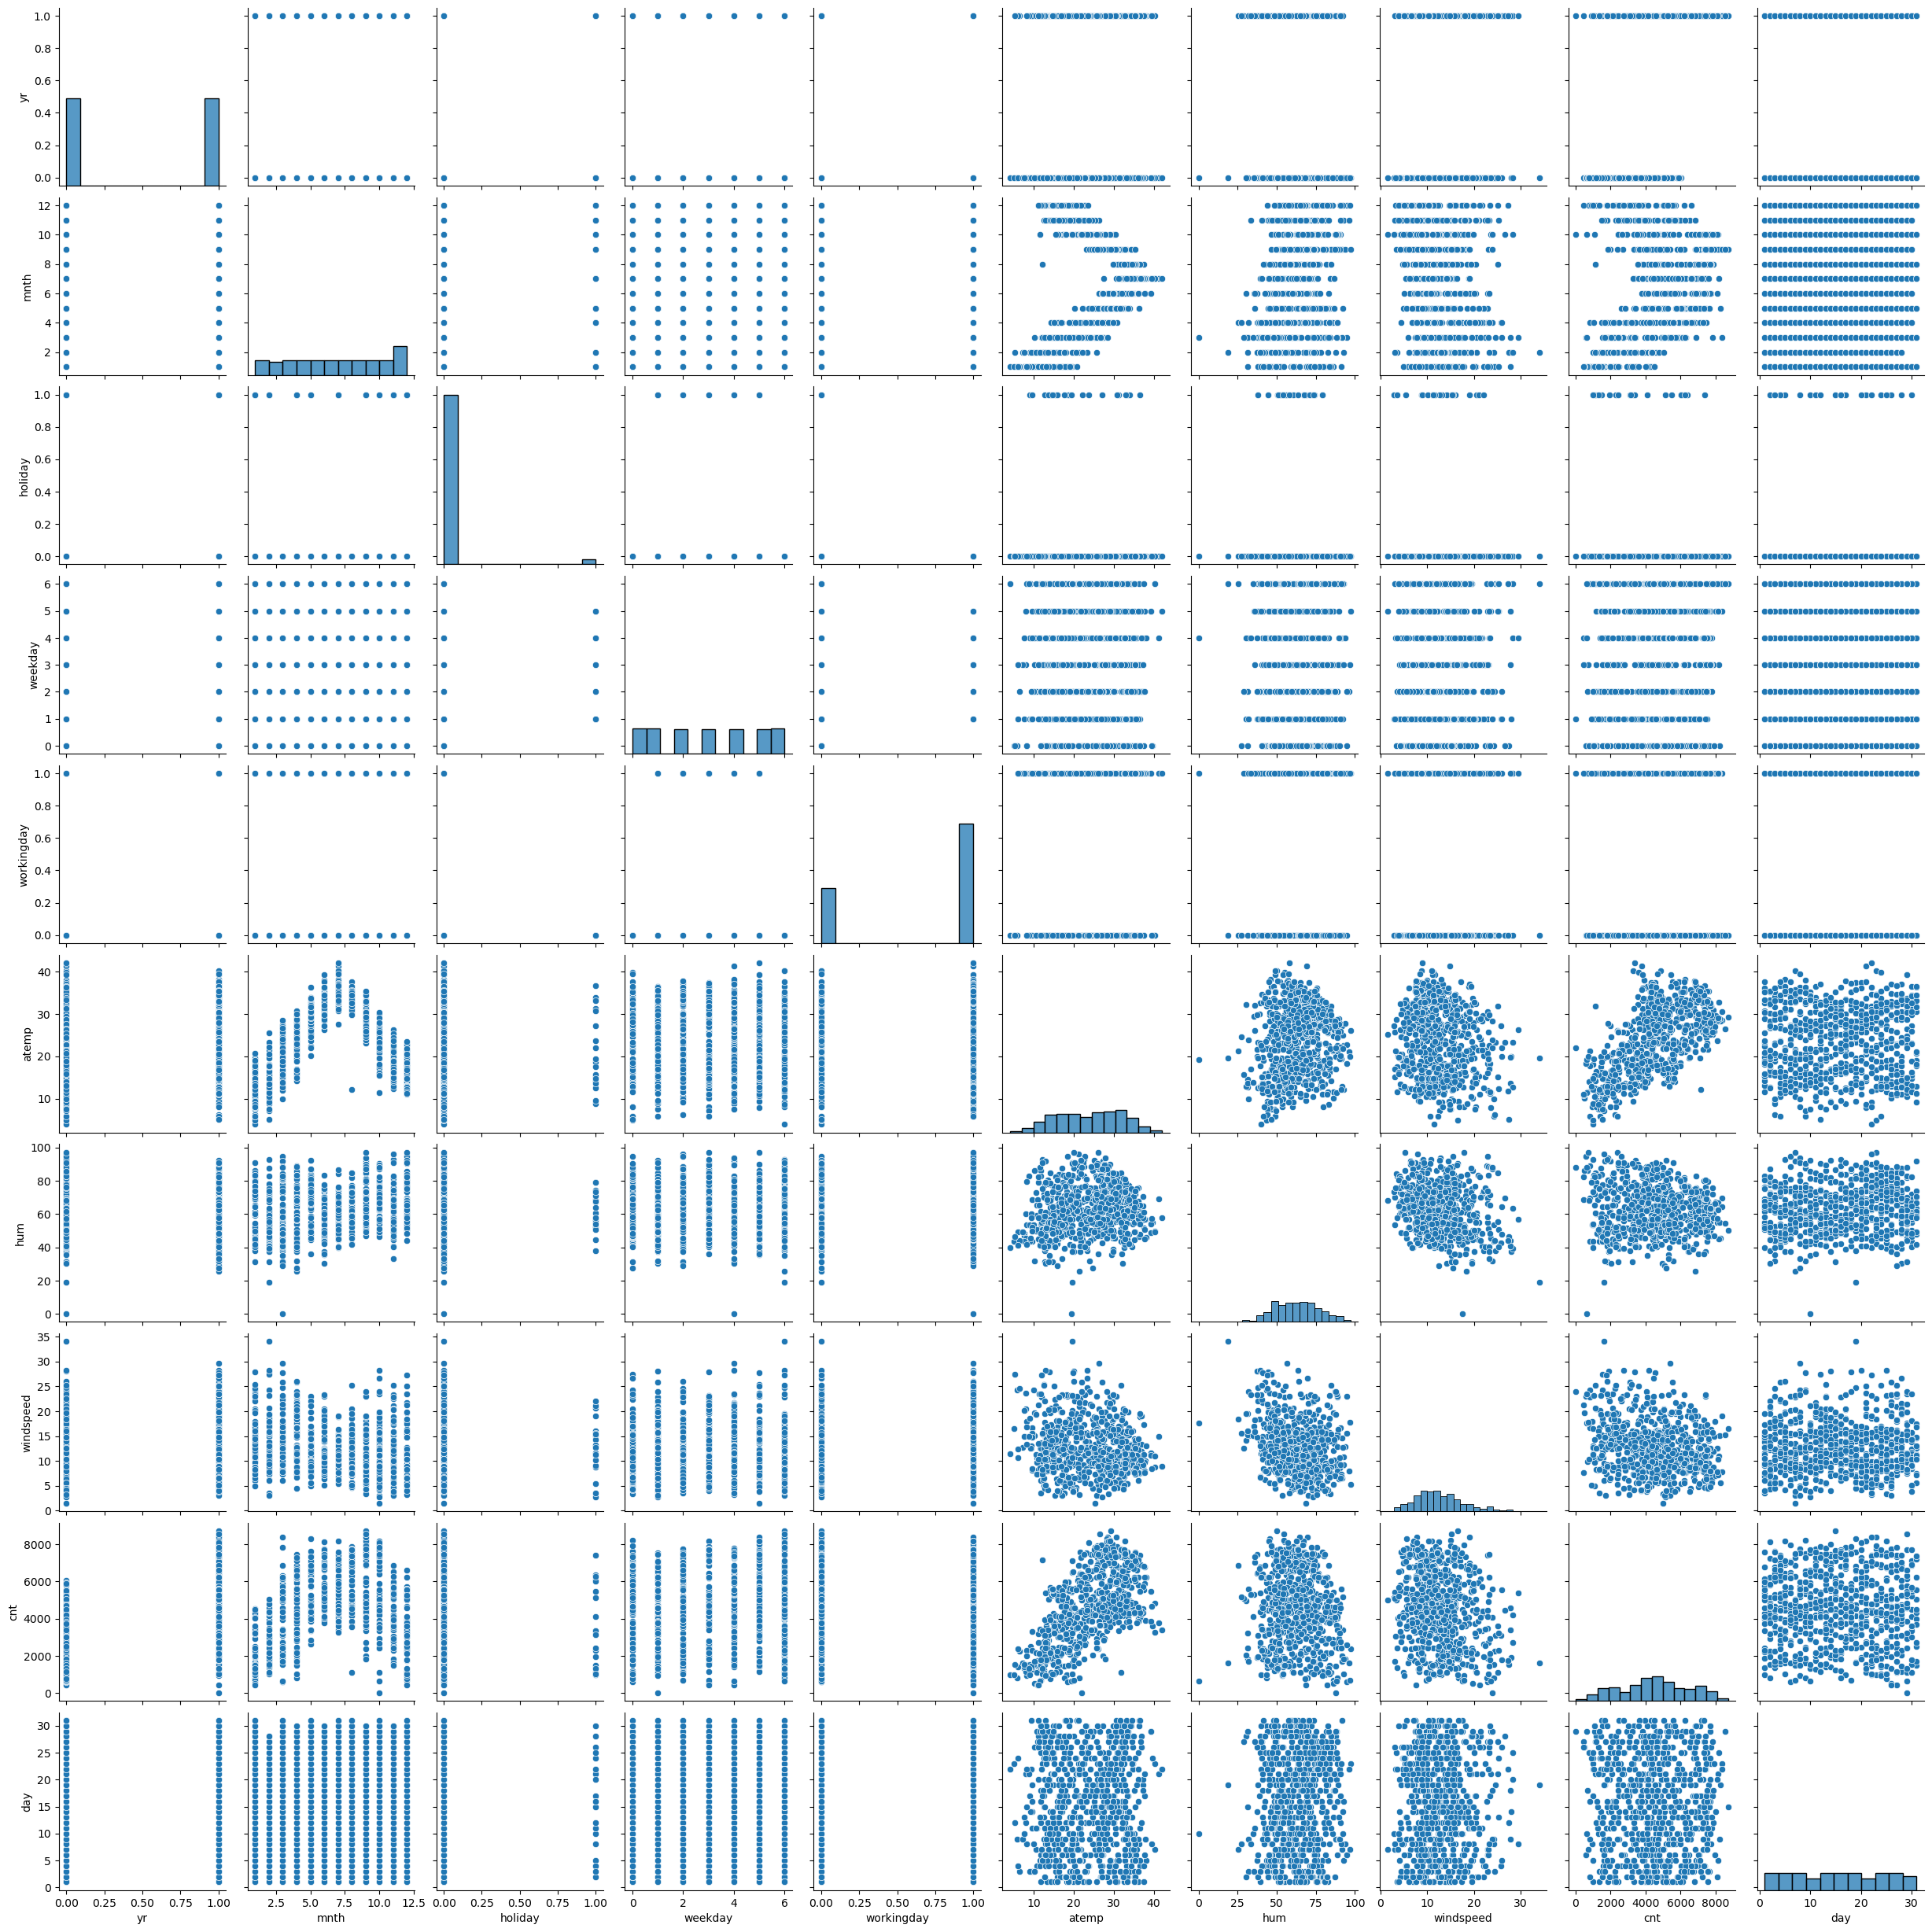

In [88]:
sns.pairplot(dailyBikeData)
#sns.pairplot(dailyBikeData, vars=["atemp", "hum",'windspeed','weekday','workingday','cnt'])
plt.show()

#### Visualising Categorical Variables

As you might have noticed, there are a few categorical variables as well. Let's make a boxplot for some of these variables.

<Axes: xlabel='weathersit', ylabel='cnt'>

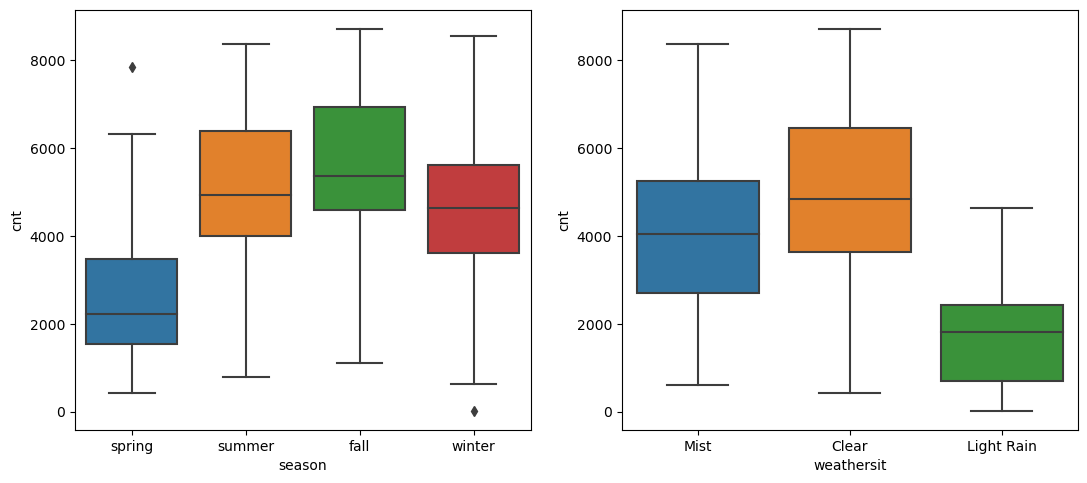

In [90]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = dailyBikeData)
plt.subplot(2,3,2)
sns.boxplot(x = 'weathersit', y = 'cnt', data = dailyBikeData)

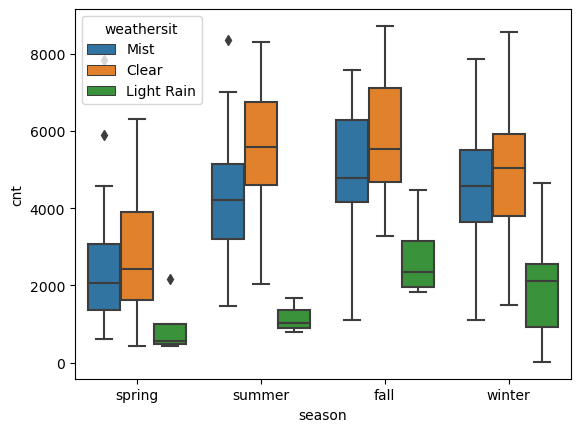

In [95]:
sns.boxplot(x = 'season', y = 'cnt', hue = 'weathersit', data = dailyBikeData)
plt.show()